In [11]:
import os
import numpy as np
import skimage as ski
from matplotlib import pyplot as plt
from random import randint
from IPython.display import clear_output
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
import sklearn.metrics as metrics

In [12]:
def load_classes(path:str):
    lookup = dict()
    reverselookup = dict()
    count = 0
    for j in os.listdir(path):
        if not j.startswith('.'): #bez ukrytych plików
            lookup[j] = count
            reverselookup[count] = j
            count = count+1

    return lookup, reverselookup, count

In [25]:
def load_images(path:str, lookup:dict):
    x_data = list()
    y_data = list()
    datacount = 0
    for i in range(0, 10):
        for j in os.listdir(path+"/0"+str(i)+"/"):
            if not j.startswith('.'):
                count = 0
                for k in os.listdir(path+"/0"+str(i)+"/"+str(j)+"/"):
                    img = ski.io.imread(fname=path+"/0"+str(i)+"/"+str(j)+"/"+k, as_gray=True)
                    start_col = (640 - 240) // 2
                    end_col = start_col + 240
                    img = img[:, start_col:end_col]

                    img = ski.transform.rescale(image=img, scale=0.33, anti_aliasing=False )
                    x_data.append(img)
                    count = count+1
                y_values = np.full((count, 1), lookup[j])
                y_data.append(y_values)
                datacount = datacount + count
                clear_output(wait=True)
                print("loaded "+str(datacount)+" images")
                    
    x_data = np.array(x_data, dtype= 'float32')
    y_data = np.array(y_data)
    y_data = y_data.reshape(datacount, 1)
    return x_data, y_data

In [22]:
path = "./data/archive/leapGestRecog"

In [15]:
lookup, reverselookup, count = load_classes(path+"/00/")
print(lookup)
print(count)

{'01_palm': 0, '03_fist': 1, '10_down': 2, '07_ok': 3, '08_palm_moved': 4, '04_fist_moved': 5, '05_thumb': 6, '02_l': 7, '09_c': 8, '06_index': 9}
10


In [26]:
x_data, y_data = load_images(path, lookup=lookup)
print("done loading")

loaded 20000 images
done loading


In [27]:
x_data.shape[1]*x_data.shape[2]

6241

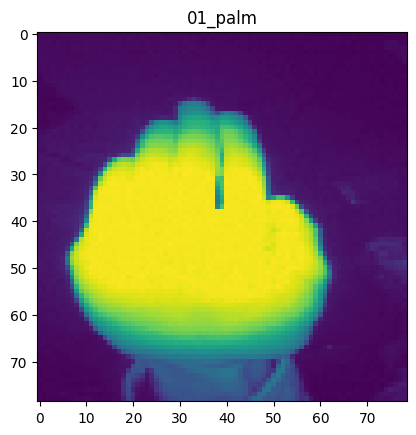

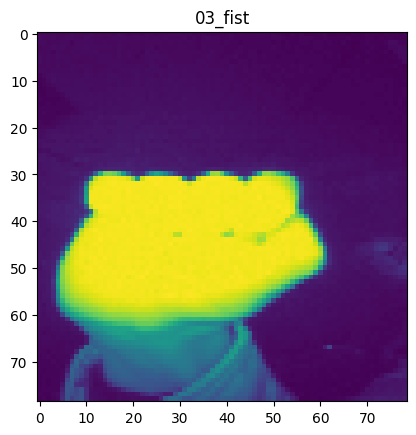

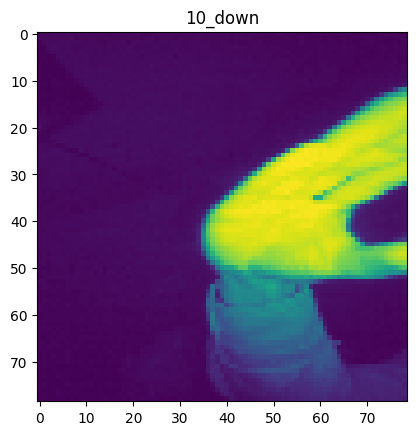

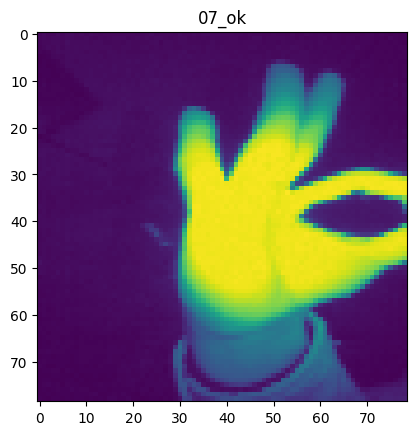

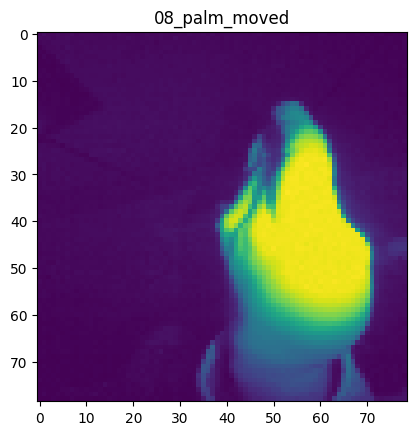

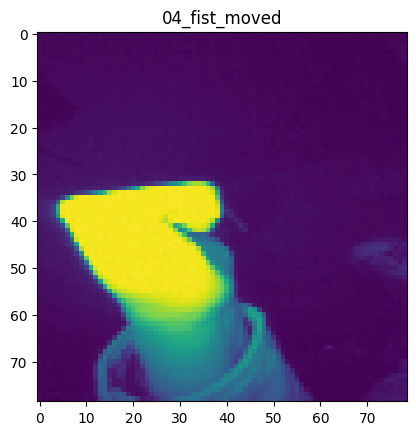

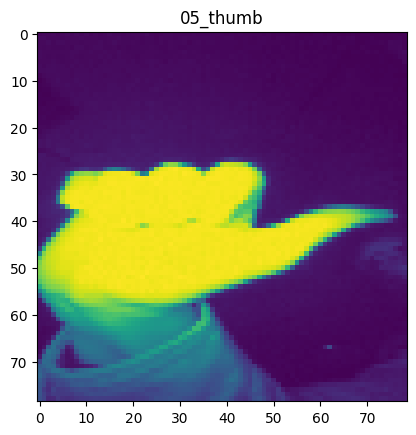

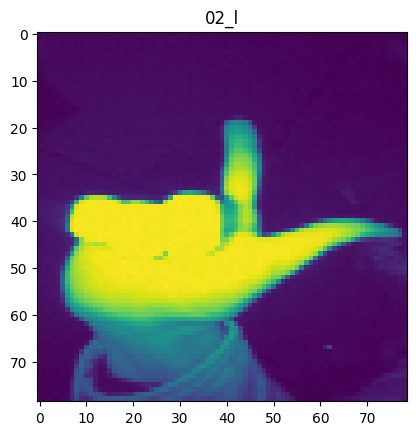

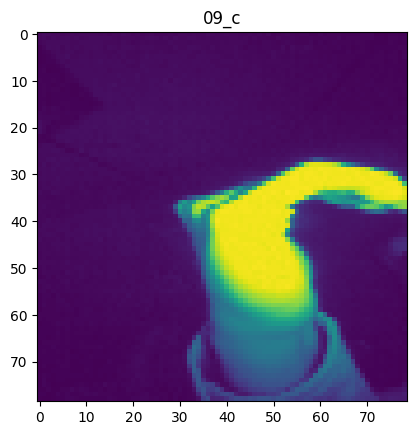

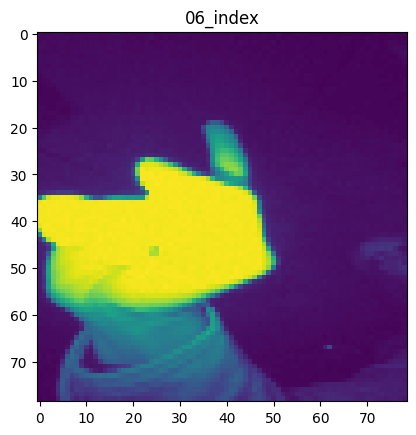

In [17]:
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()